# Revisiting Augmented Lagrangian for Constrained Bayesian Optimization


## References

[**Ariafar2019**] Setareh Ariafar, Jaume Coll-Font, Dana H. Brooks, Jennifer G. Dy:
ADMMBO: Bayesian Optimization with Unknown Constraints using ADMM. J. Mach. Learn. Res. 20: 123:1-123:26 (2019)
Journal of Machine Learning Research: http://jmlr.org/papers/volume20/18-227/18-227.pdf
Source code https://github.com/SetarehAr/ADMMBO

[**Balandat2019**] Maximilian Balandat, Brian Karrer, Daniel R. Jiang, Samuel Daulton, Benjamin Letham, Andrew Gordon Wilson, Eytan Bakshy:
BoTorch: Programmable Bayesian Optimization in PyTorch. CoRR abs/1910.06403 (2019)

[**Bayraksan2015**] Guzin Bayraksan and David K. Love, Data-Driven Stochastic Programming Using Phi-Divergences, Tutorials in Operations Reseach 

[**Bertsekas1982**]

[**Gardner2014**] Jacob R. Gardner, Matt J. Kusner, Zhixiang Eddie Xu, Kilian Q. Weinberger, John P. Cunningham:
Bayesian Optimization with Inequality Constraints. ICML 2014: 937-945

[**Gramacy2016**]  Robert B. Gramacy, Genetha A. Gray, Sébastien Le Digabel, Herbert K. H. Lee, Pritam Ranjan, Garth Wells & Stefan M. Wild (2016) Modeling an Augmented Lagrangian for Blackbox Constrained Optimization, Technometrics, 58:1, 1-11, DOI: 10.1080/00401706.2015.1014065 
ArXiv: https://arxiv.org/abs/1403.4890, Semantic Scholar: https://www.semanticscholar.org/paper/Modeling-an-augmented-Lagrangian-for-improved-Digabel-Gramacy/

[**HernndezLobato2015**] 
José Miguel Hernández-Lobato, Michael A. Gelbart,Ryan P. Adams, Matthew W. Hoffman, and ZoubinGhahramani. A General Framework for Constrained Bayesian Optimization using Information-based Search.Journal of Machine Learning Research.arXiv:1511.09422 [stat.ML]

[**Iusem1999**] 
Iusem, A.N.: Augmented Lagrangian Methods and Proximal Point Methods for Convex Optimization. ((1999

[**Jones1998**] Donald R. Jones, Matthias Schonlau, William J. Welch:
Efficient Global Optimization of Expensive Black-Box Functions. J. Glob. Optim. 13(4): 455-492 (1998)

[**Letham2019**] Benjamin Letham, Brian Karrer, Guilherme Ottoni, and Eytan Bakshy, Constrained Bayesian Optimization with Noisy Experiments, Bayesian Analysis 14 (2019), p. 495

[**Lethan2019_supplements**] Supplement to “Constrained Bayesian Optimization with Noisy Experiments” (DOI: 10.1214/18-BA1110SUPP; .pdf).

[**Milgrom2002**]

[**Picheny2016**] Victor Picheny, Robert B. Gramacy, Stefan M. Wild, Sébastien Le Digabel:
Bayesian optimization under mixed constraints with a slack-variable augmented Lagrangian. NIPS 2016: 1435-1443

[**Parikh2014**] Neal Parikh, Stephen P. Boyd:
Proximal Algorithms. Found. Trends Optim. 1(3): 127-239 (2014)

[**Rockafellar1970**]

[**Rockafellar1973**]

[**Shahriary2016**] Bobak Shahriari, Kevin Swersky, Ziyu Wang, Ryan P. Adams, Nando de Freitas:
Taking the Human Out of the Loop: A Review of Bayesian Optimization. Proc. IEEE 104(1): 148-175 (2016)

[**Schonlau1998**]

[**Sorokina2015**] Sorokina, A.N., Chervonenkis, A.Y. An improved optimization algorithm of ads’ allocation in sponsored search and the results of experiments. Autom Remote Control 76, 1315–1325 (2015). https://doi.org/10.1134/S0005117915070164

[**Wilson2017**] James T. Wilson, Riccardo Moriconi, Frank Hutter, Marc Peter Deisenroth:
The reparameterization trick for acquisition functions. CoRR abs/1712.00424 (2017)


## Abstract

We describe an algorithm for Bayesian Optimization of blackbox objective with blackbox inequality constraints based on a combination of response surface modeling with Gaussian Processes and the Augmented Lagrangian optimization framework. This approach was originally described by Gramacy et al (2016). Our principal modification to their algorithm is to move updates of the Lagrangian multipliers to the inner loop of the algorithm and estimate them from scratch after every blackbox evaluation using GP posterior distributions of the objective and constraints. We use Expected Imporovement acquisition function over Augmented Lagrangian with estimated multipliers to obtain proposal points for blackbox evaluation. This strategy proves effective and achieves competitive results in terms of number of blackbox evaluations on noiseless synthetic benchmarks. Decoupling updates of the Lagrangian multipliers from blackbox evaluations resolves a number of previous concerns for combining Augmented Lagrangian with Bayesian Optimization such as applicability to noisy functions, a need for an initial feasible point and a requirement for simultanious evaluation of the objective and constraints. Our algorithm is implemented in BoTorch - an open source library for scalable Monte-Carlo acquisiton functions. Leveraging effective Monte-Carlo from BoTorch we are able to explore combination of Bayesian Optimization with generalized Augmented Lagrangians generated by replacing quadratic penalty in dual proximal point method by generalized penalties from families of phi-divergences and Bregman divergences. We discuss an interpretation of generalized Augemented Lagrangians in Bayesian Optimization with noisy experiments as coherent utility measures for the risk-averse optimization.



## 1. Introduction

Baysian Optimization (BO) is an effective tool for solving optimization problems with expensive to evaluate blackbox functions [Jones1998]. In machine learning BO has been widely used for optimization of hyperparameters in machine learning models. Starting with a small number of randomly evaluated points a Gaussian Process (GP) regression model is fitted to the results. The GP posterior distribution provides probabilistic representation of uncertainty about outcome at each point of the domain. A new point for evaluation is chosen by optimizing an acquisition function, which encodes a value of proposal points and balances exploration vs. exploitation. For a review of basic concepts in Bayesian Optimization we refer to [Shahriari2015]. 

An extension of BO to constrained optimization problems has been recognized as important direction and number of approaches has been developed [Schonlau1998, Gardner2014, Hernandez-Lobato2015, Gramacy2016 and Picheny2016, Ariafar2019]. In machine learning constrained optimization may arise when some configurations of hyperparamters result in divergence of learning algorithm or depletion of computational resources. Constrained BO has been recently further developed in context of A/B tests to incorporate noisy objectives and noisy constraints [Letham2019]. 

As a motivating example consider an optimization problem in sponsored search advertisement. Search engines care much more about long term retention of users rather than about immediate revenues. Therefore a *quality score* is introduced in ads ranking to counter-balance aggressive bidding from low-quality ads and prevent them from appearing in search results. It has been shown [Sorokina2015] to be approximately optimal to construct aggregated quality score as a parametric function from simpler notions of ads quality, such as relevance of the ad to the search query, click-through rate and a probability of user terminating search session after a click on the ad. These quantities are usually estimated by machine learning models trained on historical data. The parameters of the aggregated quality score function are optimized in a series of noisy online experiments, with the immediate revenue taken as objective and constraining for certain levels of search results quality metrics.

From strategic viewpoint it is valuable to understand "prices" for constraints, i.e. marginal growth in objective in exchange to a small relaxation of constraints. In convex optimization problems with known functions the Lagrange multipliers have long been interpreted as the prices of constraints [Rockafellar1970, Milgrom2002]. This consideration motivates us to revisit a particular approach to constrained BO known as Augmented Lagrangian framework for constrained Bayesian Optimization (ALBO) [Gramacy2016, Picheny2016] with a goal to extract Lagrangian multipliers as primary quantities of interest and consider extensions to noisy blackbox functions. 

ALBO was introduced by Gramacy et al [Gramacy2016]. Given a problem with inequality constraints, a set of data points evaluated so far and an estimate of Lagrange multipliers, the iteration of algorithm starts by fitting independent GPs for objective and each constraint. The GPs are scalarized in a single objective using a linear combination of objective and constraints with Lagrange multipliers and a quadratic penalty for violated constraints. The Expected Improvement (EI) acquisition function is optimized to produce a proposal point for blackbox evaluation. Depending on the outcome of the evaluations the estimates of Lagrangian multipliers are updated and a penalty rate parameter is increased.

Original ALBO algorithm for noiseless optimization problems has been found to be inferrior to other methods including Slack-AL [Picheny2016], PESC[Hernandez-Lobato2015] and ADMMBO [Ariafar2019] in sample effieciency, i.e. number of blackbox evaluations required to find a feasible point within a choosen gap from optimal value of objective. In this work we propose a modification to original ALBO which brings it on par with results reported by these algorithms. 

Next, we extend original ALBO and explore a variety of generalized Augmented Lagrangians in place of classical AL with square penalties. Following Iusem [Iusem1999] we consider two families of ALs derived from families of distance-like functions known as phi-divergences and Bregman divergences. 

Letham et al [Letham2019] discusses a notion of utility function optimized by acquisition strategies. They define utility function of the optimizer as either the best value of objective among visited feasible points, or a large constant penalty if no feasible points has been found yet. Using this definition they introduce *improvement* function and define *expected improvement with infeasibility* at a proposal point as the expected value of improvement over GP posterior. They further extend this definition to the case of noisy constraints and introduce *noisy EI* by additionally averaging *EI with infeasibility* over posterior probability of the observations.

We follow the same path and consider generalized ALs as data-driven utility functions encoding risk-aversion preferences of optimizer to infeasible points. For example in noisy settings the final choice of the best point has to be made and it appears to be a difficult decision. As discussed by Letham et al [Letham2019] A/B tests teams prefer to manually select the final point according to their understanding of the trade-offs between constraints, objective and uncertainty. We suggest that AL framework provides a viable alternative by explicitly accounting for trade-offs between constraints and objective via Lagrange multipliers and incorporating risk-aversion to infeasible points via penalty function with adjustable risk-aversion rate.

Implemetation of ALBO with generalized ALs has been greatly simplified by advances in Monte-Carlo methods for numerical computation and efficient optimization of acquisition functions [Wilson2016, Letham2019]. Our implementation uses BoTorch [Balandat2019] - an open source library for scalable Monte-Carlo acquisiton functions developed at Facebook.

We review background theory of generalized Augmented Lagrangians in Section 2 and present our modified ALBO algorithm in Section 3. We discuss results on noiseless synthetic benchmarks in Section 4. In Section 5 we discuss extensions to noisy settings combining ALBO with noisy EI. In Section 6 we discuss interpretations and possible extensions.

## 2. Review of Augmented Lagrangian framework

Consider an inequality optimization problem in canonical form
$$
\begin{eqnarray}
f(x) \rightarrow min., s.t.\\
c_i(x) \leq 0, i = 1...m \\
x \in B
\end{eqnarray}
$$

and an ordinary Lagrangian for this problem

$$
L(x, \lambda) = f(x) + \sum_i \lambda_i c_i(x).
$$

Maximizing over $\lambda > 0$ we obtain an equivalent unconstrained optimization problem for a extended-value function which encodes constraints into the function value

$$
F(x) = \max_{\lambda \geq 0} L(x, \lambda) = \left\{
\begin{eqnarray}
f(x) \quad \mathrm{if} \quad x \quad \mathrm{feasible} \\
+\infty \quad \mathrm{otherwise}
\end{eqnarray}
\right.
$$

This function is hard to optimize, because the objective is discontinious at the borders of the feasible region. 

It is possible to apply Proximal Point (PP) method to this problem [Parikh????] to convert a difficult problem into a sequence of easier regularized problems, where the regularization term is taken to be squared euclidean distance to previous estimate of the solution.

$$
F(x) = \max_{\lambda \geq 0} f(x) + \sum_i \lambda_i c_i(x) - \frac{1}{2\rho} \sum_i(\lambda_i - \lambda_i^k)^2
$$

This is a separable quadratic optimization problem with bound constraints. From first order optimality condition with respect to $\lambda_i$ we find that

$$
\lambda_i(x) = \max(0, \lambda_i^k + \rho c_i(x))
$$

Substituing this back into the optimization problem we arrive at the Augmented Lagrangian

$$
\hat L(x, \lambda, \rho) = f(x) + \sum_i \psi(c_i(x), \lambda_i^k, \rho)
$$

with classic penalty function [Rockafellar1973] given by

$$
\psi(t, \lambda, \rho) = \left\{
\begin{eqnarray}
-\lambda^2 / (2\rho)  \quad \mathrm{if} \quad \lambda + \rho t \le 0  \\ 
\lambda t + \frac{\rho}{2} t^2, \quad \mathrm{otherwise}
\end{eqnarray}
\right.
$$

In a Augmented Lagrangian optimization scheme we first solve an unconstrained minimization problem for the Augmented Lagrangian with some fixed lagrange multipliers $\lambda^k$ to find minimizer $x^{k+1}$ and then use a dual solution to update estimates of Lagrange multipliers

$$
\lambda_i^{k+1} = \max(0, \lambda_i^k + \rho c_i(x_k)).
$$

For convex optimization problem, when the solution exists, the sequence $\left\{(x^k, \lambda^k)\right\}$ converges to the point $(x^*, \lambda^*)$ satisfying KKT conditions [Rockafellar1973, Iusem1999]

$$
0 \in \partial f(x^*) + \sum_i \lambda^*_i \partial c_i(x^*), \quad \lambda^*_i \geq 0, \quad \lambda^*_i c_i(x^*) = 0, \quad c_i(x^*) \leq 0
$$

A deep connection between AL method for the primal problem and PP method for the dual [Iusem1999] has been used to introduce generalized AL methods by replacing square penalty in the PP method for the dual by replacing euclidean distance with generalized distances from two families, known as Bregman divergences and $\phi$-divergences. A generalized AL (GAL) associated with either Bregman divergence or phi-divergence is given by

$$
\hat L(x, \lambda^k, \rho) = f(x) + \sum_i \hat\psi(c_i(x), \lambda^k, \rho)
$$

It generates a sequence of points by 

$$
x^{k+1} = \mathrm{argmin}_{x} \hat L(x, \lambda^k, \rho)
$$

$$
\lambda^{k+1}_i = \hat\psi^{\prime}(c_i(x^{k+1}), \lambda^k, \rho)
$$

Note that classic AL also fits in this framework. In Table 1 we present common GAL penalty functions and multipliers updates.

## Modified ALBO algorithm

Gramacy et al [Gramacy2016] proposed to handle constraints by combining GP posteriors with AL and use EI acquisition function over combined posterior to choose next point for evaluation. Taking an initial set of points they evaluate blackbox objective and constraints and fit independent GP models to them.  An explicit functional form for EI of Augmented Lagrangian is not known, but it is possible to compute EI using Monte-Carlo. Gramacy et al proposes an  Optimization of EI (inner optimization loop in their algorithm) gives a next proposal point and they proceed by evaluating blackbox objective and constraints at that point. Next they update GPs and update estimates of Lagrange Multipliers using the described update rule. 

We note that a particular choice of AL in [Gramacy2016] is unconventional and authors do not provide a reference to the source. Picheny et al [Picheny2016] follows [Bertsekas1982] and introduce Slack-AL formulation by converting inequality constraints to equality constraints with the help of additional slack variables. It is possible to explicitly solve for slack variables and this recovers exactly the same AL equation as given by [Rockafellar1973] and by equation () in the previous section. 

Both [Gramacy2016] and [Picheny2016] assume noiseless blackbox functions and use true values of objective and constraints at the evaluated points for updates of Lagrangian multipliers. In Slack-AI formulation the EI optimization step requires evaluation of a closed form formula for slack variables at the new points and authors propose to use information from GP, i.e. posterior mean of constraints in place of true function values. 

In this work we propose to modify the algorithm along this line further and move AL iterations into the inner loop of the algorithm. We propose to reinitialize Lagrangian Multipliers after every blackbox evaluation and run AL interations to convergence. We propose to obtain $x^k$ by optimization of the predictive mean of AL using initial estimates of Lagrange multipliers $\lambda_i^k$ and then update multipliers using expected value of the update rule with respect to GP posterior distribution of $c_i(x)$ at the point $x_k$

$$
\lambda_i^{k+1} = E_{\tau \sim P[c_i(x)]}\left[\hat\psi^{\prime}(\tau, \lambda^k, \rho)\right],
$$

where $\hat\psi^{\prime}$ is derivative with respect to the first argument of the penalty function for either classical or generalized AL.

We find empirically in experiments with synthetic benchmarks that GP surrogates provide enough information for a estimation of Lagrange Multipliers and the AL iterations quickly converge. We also note, that for non-convex objectives and constraints Lagrange Multipliers are local to each local optimum and it doesn't make much sense to keep global Lagrange Multipliers. We propose to start the iterations from small values of $\lambda_i^0$ thus obtaining an estimate of unconstrained maximum at the start of the iterations and than following a path to a border of feasible set.

The next step is to use the estimated values of Lagrangian multipliers in the optimization of the EI acquisition function over the Augmented Lagrangian. The EI acquisition function requires to specify a baseline value over which the improvement is to be found. We propose to use the mean value of Augmented Lagrangian at the final point $x^*$ of the Augmented Lagrangian iterations. Finally we optimize the EI and obtain the next proposal point. The algorithm is summarised in the Algorithm 1.

Algorithm 1:
1) Initialization:
- choose learning rate $\rho$
- choose uniformly at random M points and evaluate blackbox objective and contraints
- fit GPs for objective and constraints

2) Loop until termination:

2.1) Inner Augmented Lagrangian optimization
- initialize $\lambda_i^0 = 0$
- loop until convergence to point ($x*, \lambda^*$):
  - optimize predictive mean of Augmented Lagrangian to obtain iterate $x_k$
  - update multipliers $\lambda_i^{k+1} = E_{c_i(x)}\left[max(0, \lambda_i^k + \rho c_i(x)\right]$

2.2) Inner Expected Improvement optimization
- compute $L_A^*$ as mean of Augmented Lagrangian at the point $x^*$
- optimize EI of the Augmented Lagrangian using ($\lambda^*, L_A^*$) and obtain proposal point $x$

2.3) Outer loop
- evaluate blackbox objective and constraints at $x$
- update GPs with using the outcome of blackbox functions


## Experiments with synthetic functions

Recently Ariafar et al [Ariafar2019] proposed ADMMBO a Bayesian Optimization scheme combining Alternating Directions Method of Multipliers with GP surrogates and obtained state of the art results for the comprehensive set of synthetic benchmarks. They also provide results of four other methods (_list of methods_) for comparison. We evaluate our method on the same set of synthetic benchmarks and find that results compare favorably to other methods including ADMMBO itself on the basis of total number of blackbox evaluations and on the precision of the solutions

### Test with small feasibility region 
Our result `experiments/classic_gardner_1/results/plots_gardner.ipynb`

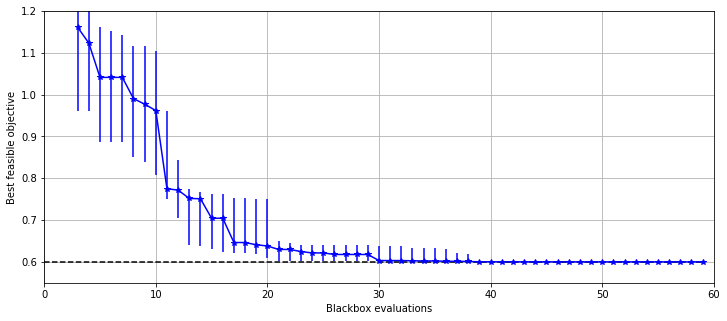

Compare to [Ariafar2019, Section 5.3, Figure 1] 

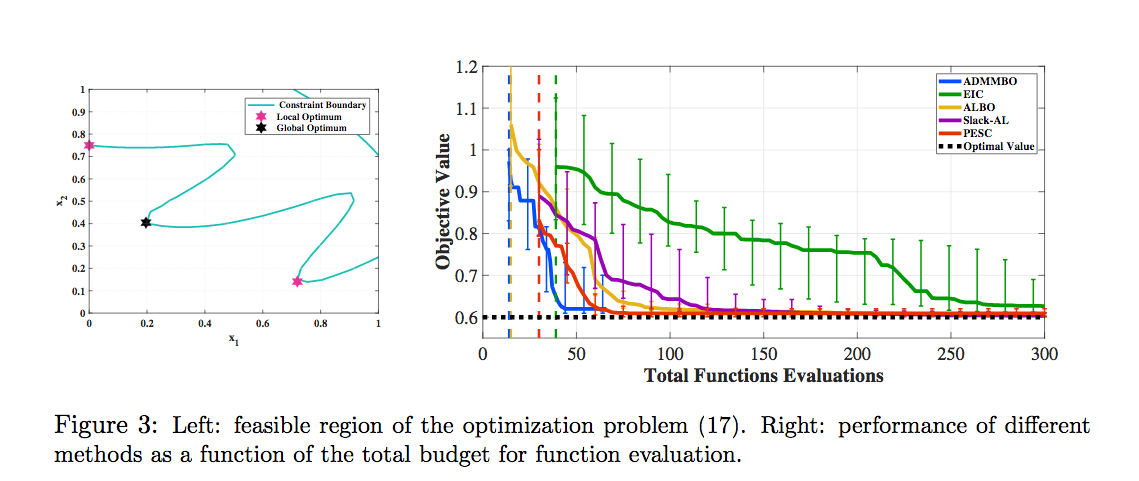


### Test with multiple constraints
Our result `experiments/classic_gramacy_1/results/plots_gramacy.ipynb`

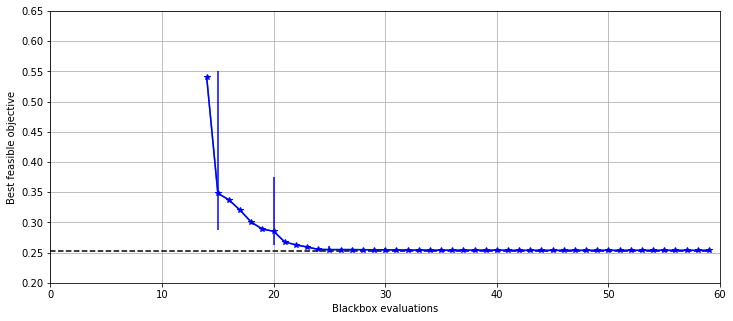

Compare to [Ariafar2019, Section 5.4, Figure 3] 

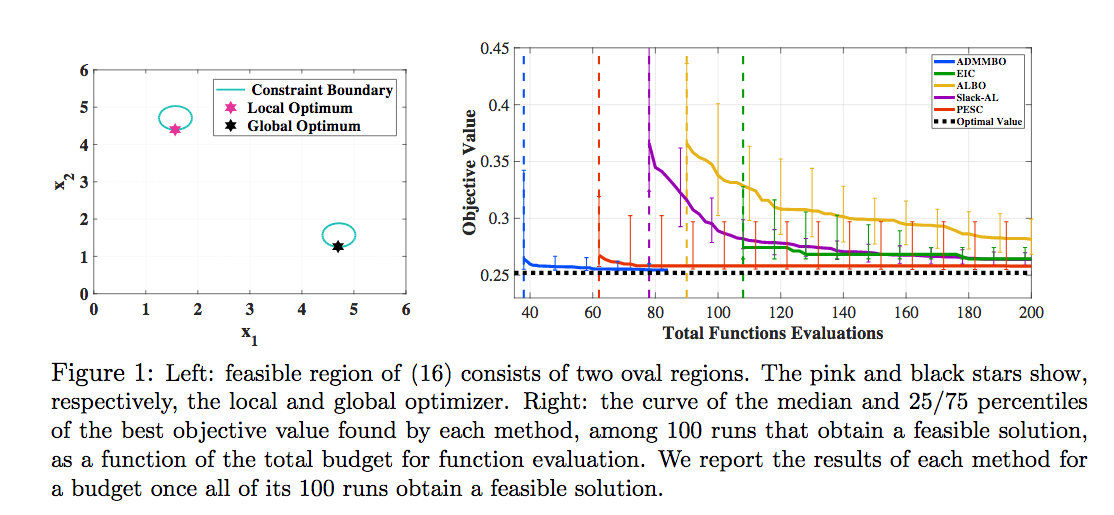

### Test problem in higher dimensions 
TODO



## Experiment on the real-world problem
TODO
